# Line graph over across time points

In [ ]:
# Install libraries
!pip install pandas openpyxl

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel("Statistics-behavioural_recording.xlsx")
df

,Selection Result,Trial,Arena,Distance moved,Velocity,Movement,Movement.1
0,NaN,NaN,NaN,Center-point,Center-point,Moving / Center-point,Not Moving / Center-point
1,NaN,NaN,NaN,Total,Mean,Cumulative Duration,Cumulative Duration
2,NaN,NaN,NaN,mm,mm/s,s,s
3,Result 1,Trial 1,1.0,10.5593,2.12888,0.64,4.32
4,Result 1,Trial 1,2.0,36.6747,7.39409,3.4,1.56
...,...,...,...,...,...,...,...
766,Result 1 (8),Trial 1,92.0,0,0,0,5
767,Result 1 (8),Trial 1,93.0,0,0,0,5
768,Result 1 (8),Trial 1,94.0,0,0,0,5
769,Result 1 (8),Trial 1,95.0,0,0,0,5


In [ ]:
# Drop the first three rows of data as they contain unnecessary information
df = df.drop(df.index[:3])
df.reset_index(drop=True, inplace=True)
df

,Selection Result,Trial,Arena,Distance moved,Velocity,Movement,Movement.1
0,Result 1,Trial 1,1.0,10.5593,2.12888,0.64,4.32
1,Result 1,Trial 1,2.0,36.6747,7.39409,3.4,1.56
2,Result 1,Trial 1,3.0,24.0668,4.85217,3.12,1.84
3,Result 1,Trial 1,4.0,39.0116,7.86524,2.88,2.08
4,Result 1,Trial 1,5.0,8.83317,1.78088,2.12,2.84
...,...,...,...,...,...,...,...
763,Result 1 (8),Trial 1,92.0,0,0,0,5
764,Result 1 (8),Trial 1,93.0,0,0,0,5
765,Result 1 (8),Trial 1,94.0,0,0,0,5
766,Result 1 (8),Trial 1,95.0,0,0,0,5


In [ ]:
# Drop unnecessary columns, including Trial, Velocity, Movement, Movement.1
columns_to_drop = ['Trial', 'Velocity', 'Movement', 'Movement.1']
df = df.drop(columns=columns_to_drop, axis=1)
df

,Selection Result,Arena,Distance moved
0,Result 1,1.0,10.5593
1,Result 1,2.0,36.6747
2,Result 1,3.0,24.0668
3,Result 1,4.0,39.0116
4,Result 1,5.0,8.83317
...,...,...,...
763,Result 1 (8),92.0,0
764,Result 1 (8),93.0,0
765,Result 1 (8),94.0,0
766,Result 1 (8),95.0,0


In [ ]:
# Increment the index by 1 to start from 1 instead of 0
df.index += 1
df

,Selection Result,Arena,Distance moved
1,Result 1,1.0,10.5593
2,Result 1,2.0,36.6747
3,Result 1,3.0,24.0668
4,Result 1,4.0,39.0116
5,Result 1,5.0,8.83317
...,...,...,...
764,Result 1 (8),92.0,0
765,Result 1 (8),93.0,0
766,Result 1 (8),94.0,0
767,Result 1 (8),95.0,0


In [ ]:
# Input statements for group information
num_groups = int(input("Enter the number of groups: "))
group_names = []
arena_ranges = []

for group_num in range(1, num_groups + 1):
    group_names.append(input(f"Enter the name for group {group_num}: "))
    start = int(input(f"Enter the start of Arena number range for group {group_num}: "))
    end = int(input(f"Enter the end of Arena number range for group {group_num}: "))
    arena_ranges.append((group_names[-1], start, end))

Enter the number of groups: 3
Enter the name for group 1: GroupA
Enter the start of Arena number range for group 1: 1
Enter the end of Arena number range for group 1: 12
Enter the name for group 2: GroupB
Enter the start of Arena number range for group 2: 13
Enter the end of Arena number range for group 2: 24
Enter the name for group 3: GroupC
Enter the start of Arena number range for group 3: 25
Enter the end of Arena number range for group 3: 36


In [ ]:
# Concatenate data from all groups into a single DataFrame
grouped_data = pd.concat(
    [df[(df['Arena'] >= start) & (df['Arena'] <= end)].assign(Group=group_name)
     for group_name, start, end in arena_ranges]
)
grouped_data

,Selection Result,Arena,Distance moved,Group
1,Result 1,1.0,10.5593,GroupA
2,Result 1,2.0,36.6747,GroupA
3,Result 1,3.0,24.0668,GroupA
4,Result 1,4.0,39.0116,GroupA
5,Result 1,5.0,8.83317,GroupA
...,...,...,...,...
704,Result 1 (8),32.0,15.4575,GroupC
705,Result 1 (8),33.0,0,GroupC
706,Result 1 (8),34.0,0.847644,GroupC
707,Result 1 (8),35.0,17.3113,GroupC


In [ ]:
# Input for the number of subcategories (time points)
num_subcategories = int(input("Enter the number of time points: "))

Enter the number of time points: 8


In [ ]:
# Grouping function to divide data into subcategories
def divide_groups(grouped_data, num_subcategories):
    divided_df_list = []
    for group_name in grouped_data['Group'].unique():
        group_df = grouped_data[grouped_data['Group'] == group_name]
        num_rows = len(group_df)
        subcategory_size = num_rows // num_subcategories
        for i in range(num_subcategories):
            start = i * subcategory_size
            end = (i + 1) * subcategory_size if i < num_subcategories - 1 else num_rows
            divided_group_df = group_df.iloc[start:end].copy()
            divided_group_df['Subcategory'] = i + 1
            divided_df_list.append(divided_group_df)
    return pd.concat(divided_df_list)

# Applying the grouping function
grouped_data_with_subcategories = divide_groups(grouped_data, num_subcategories)
grouped_data_with_subcategories

,Selection Result,Arena,Distance moved,Group,Subcategory
1,Result 1,1.0,10.5593,GroupA,1
2,Result 1,2.0,36.6747,GroupA,1
3,Result 1,3.0,24.0668,GroupA,1
4,Result 1,4.0,39.0116,GroupA,1
5,Result 1,5.0,8.83317,GroupA,1
...,...,...,...,...,...
704,Result 1 (8),32.0,15.4575,GroupC,8
705,Result 1 (8),33.0,0,GroupC,8
706,Result 1 (8),34.0,0.847644,GroupC,8
707,Result 1 (8),35.0,17.3113,GroupC,8


In [ ]:
# Calculate mean and standard error for each group and subcategory
grouped_means = grouped_data_with_subcategories.groupby(['Group', 'Subcategory'])['Distance moved'].agg(['mean', 'sem'])
grouped_means

mean       sem
Group  Subcategory                     
GroupA 1            23.405128  3.821664
       2             9.669368  1.064605
       3             6.549537  2.028141
       4             4.981557  1.757631
       5             6.565518  2.732004
       6             6.347571  1.715304
       7             5.686137  1.524163
       8             7.720632  2.233500
GroupB 1            13.119839  2.382295
       2             9.851092  1.768562
       3             9.040947  2.551396
       4             8.499013  2.642307
       5             7.919601  2.408245
       6             5.538427  2.041708
       7             6.535213  2.654196
       8             5.296473  2.227610
GroupC 1            11.445522  3.443372
       2            10.494665  2.382597
       3             7.409023  2.433312
       4             7.974389  2.336529
       5            10.353827  3.351775
       6             6.238564  1.886607
       7             7.448666  2.393908
       8             7.784389  2.452571

In [ ]:
# Reset index to make 'Group' and 'Subcategory' columns accessible for plotting
grouped_means.reset_index(inplace=True)

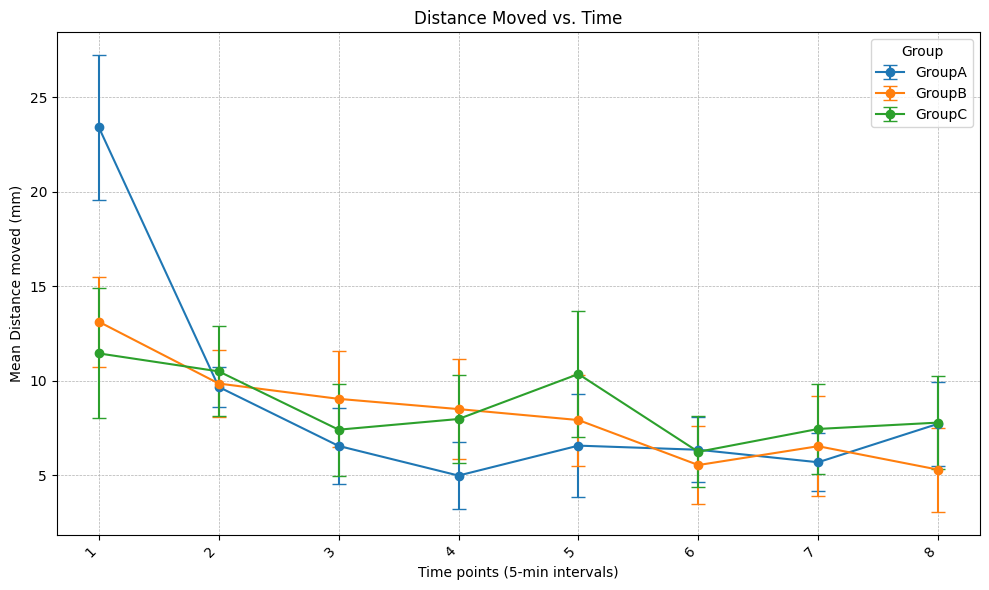

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.tab10.colors  # Using a colormap for distinct colors
color_map = {}  # Dictionary to store group-color mapping

for idx, (name, group) in enumerate(grouped_means.groupby('Group')):
    if not group.empty:  # Ensure the group has data
        x = group['Subcategory']
        y = group['mean']
        error = group['sem']
        color = colors[idx % len(colors)]  # Ensure color index is within range
        color_map[name] = color
        ax.errorbar(x, y, yerr=error, label=name, color=color, capsize=5, marker='o', linestyle='-')

ax.set_xlabel('Time points (5-min intervals)')
ax.set_ylabel('Mean Distance moved (mm)')
ax.set_title('Distance Moved vs. Time')

# Ensure the legend only includes labels that were plotted
handles, labels = ax.get_legend_handles_labels()
if handles and labels:
    ax.legend(handles, labels, title='Group')

ax.grid(True, linestyle='--', linewidth=0.5)  # Adding gridlines

plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout for better spacing
plt.show()

In [ ]:
# Import library for plotly
import plotly.graph_objects as go

# Plotting with Plotly
fig = go.Figure()

for group in grouped_means['Group'].unique():
    group_data = grouped_means[grouped_means['Group'] == group]
    fig.add_trace(go.Scatter(
        x=group_data['Subcategory'],
        y=group_data['mean'],
        error_y=dict(type='data', array=group_data['sem'], visible=True),
        mode='lines+markers',
        name=group
    ))

fig.update_layout(
    title='Distance Moved vs. Time',
    xaxis_title='Time points (5-min intervals)',
    yaxis_title='Mean Distance moved (mm)',
    template='plotly_white',
    legend_title='Group',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)

fig.show()

# Column graph for total distance moved

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the excel file intop a pandas dataframe
df = pd.read_excel("Statistics-summary.xlsx")

# Display the dataframe
df

,Trial,Arena,Distance moved,Velocity,Movement,Movement.1
0,NaN,NaN,Center-point,Center-point,Moving / Center-point,Not Moving / Center-point
1,NaN,NaN,Total,Mean,Cumulative Duration,Cumulative Duration
2,NaN,NaN,mm,mm/s,s,s
3,Trial 1,1.0,6471.24,2.69334,1342.72,1062.28
4,Trial 1,2.0,6355.44,2.64515,1471.44,933.56
...,...,...,...,...,...,...
94,Trial 1,92.0,3270.16,1.36105,883.2,1521.8
95,Trial 1,93.0,310.942,0.129415,70.28,2334.72
96,Trial 1,94.0,311.775,0.129761,5,2400
97,Trial 1,95.0,3947.04,1.64276,1071.92,1333.08


In [ ]:
# Drop the first three rows of data in the dataframe as it contrains unnecessary information
df = df.drop(df.index[:3])
df

,Trial,Arena,Distance moved,Velocity,Movement,Movement.1
3,Trial 1,1.0,6471.24,2.69334,1342.72,1062.28
4,Trial 1,2.0,6355.44,2.64515,1471.44,933.56
5,Trial 1,3.0,7152.09,2.97671,1600,805
6,Trial 1,4.0,6436.91,2.67905,1335.4,1069.6
7,Trial 1,5.0,6647.48,2.76669,1640.48,764.52
...,...,...,...,...,...,...
94,Trial 1,92.0,3270.16,1.36105,883.2,1521.8
95,Trial 1,93.0,310.942,0.129415,70.28,2334.72
96,Trial 1,94.0,311.775,0.129761,5,2400
97,Trial 1,95.0,3947.04,1.64276,1071.92,1333.08


In [ ]:
# Reset the index of the dataframe as it now go on from 3
df.reset_index(drop=True, inplace=True)

# Display the dataframe to see how index numbers and arena names
df

,Trial,Arena,Distance moved,Velocity,Movement,Movement.1
0,Trial 1,1.0,6471.24,2.69334,1342.72,1062.28
1,Trial 1,2.0,6355.44,2.64515,1471.44,933.56
2,Trial 1,3.0,7152.09,2.97671,1600,805
3,Trial 1,4.0,6436.91,2.67905,1335.4,1069.6
4,Trial 1,5.0,6647.48,2.76669,1640.48,764.52
...,...,...,...,...,...,...
91,Trial 1,92.0,3270.16,1.36105,883.2,1521.8
92,Trial 1,93.0,310.942,0.129415,70.28,2334.72
93,Trial 1,94.0,311.775,0.129761,5,2400
94,Trial 1,95.0,3947.04,1.64276,1071.92,1333.08


In [ ]:
# Reset the index of the dataframe as it now go on from 3
df.reset_index(drop=True, inplace=True)

# Display the dataframe to see how index numbers and arena names
df

,Trial,Arena,Distance moved,Velocity,Movement,Movement.1
0,Trial 1,1.0,6471.24,2.69334,1342.72,1062.28
1,Trial 1,2.0,6355.44,2.64515,1471.44,933.56
2,Trial 1,3.0,7152.09,2.97671,1600,805
3,Trial 1,4.0,6436.91,2.67905,1335.4,1069.6
4,Trial 1,5.0,6647.48,2.76669,1640.48,764.52
...,...,...,...,...,...,...
91,Trial 1,92.0,3270.16,1.36105,883.2,1521.8
92,Trial 1,93.0,310.942,0.129415,70.28,2334.72
93,Trial 1,94.0,311.775,0.129761,5,2400
94,Trial 1,95.0,3947.04,1.64276,1071.92,1333.08


In [ ]:
# Asssign to dataframe
df = pd.DataFrame(df)

In [ ]:
# Input statements
num_groups = int(input("Enter the number of groups: "))
group_names = []
arena_ranges = []

for group_num in range(1, num_groups + 1):
    group_names.append(input(f"Enter the name for group {group_num}: "))
    start = int(input(f"Enter the start of Arena number range for group {group_num}: "))
    end = int(input(f"Enter the end of Arena number range for group {group_num}: "))
    arena_ranges.append((group_names[-1], start, end))

Enter the number of groups: 3
Enter the name for group 1: GroupA
Enter the start of Arena number range for group 1: 1
Enter the end of Arena number range for group 1: 12
Enter the name for group 2: GroupB
Enter the start of Arena number range for group 2: 13
Enter the end of Arena number range for group 2: 24
Enter the name for group 3: GroupC
Enter the start of Arena number range for group 3: 25
Enter the end of Arena number range for group 3: 36


In [ ]:
# Concatenate data from all groups into a single DataFrame
grouped_data = pd.concat(
    [df[(df['Arena'] >= start) & (df['Arena'] <= end)].assign(Group=group_name)
     for group_name, start, end in arena_ranges]
)

# Display the combined data in a single DataFrame
print("Combined Data:")
grouped_data

Combined Data:


,Trial,Arena,Distance moved,Velocity,Movement,Movement.1,Group
0,Trial 1,1.0,6471.24,2.69334,1342.72,1062.28,GroupA
1,Trial 1,2.0,6355.44,2.64515,1471.44,933.56,GroupA
2,Trial 1,3.0,7152.09,2.97671,1600,805,GroupA
3,Trial 1,4.0,6436.91,2.67905,1335.4,1069.6,GroupA
4,Trial 1,5.0,6647.48,2.76669,1640.48,764.52,GroupA
5,Trial 1,6.0,5809.31,2.41785,1374.96,1030.04,GroupA
6,Trial 1,7.0,7181.68,2.98903,1483.2,921.8,GroupA
7,Trial 1,8.0,7549.99,3.14232,1585,820,GroupA
8,Trial 1,9.0,7026.8,2.92457,1482.08,922.92,GroupA
9,Trial 1,10.0,7015.57,2.9199,1318.4,1086.6,GroupA


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grouped_data_1 = grouped_data
df = grouped_data_1
# Replace 'Group' and 'Distance moved' with your actual column names
grouped_data = df.groupby('Group')['Distance moved'].agg(['mean', 'sem'])
grouped_data

,mean,sem
Group,,
GroupA,6597.155,254.366268
GroupB,3750.033333,502.665093
GroupC,4687.593333,670.529713


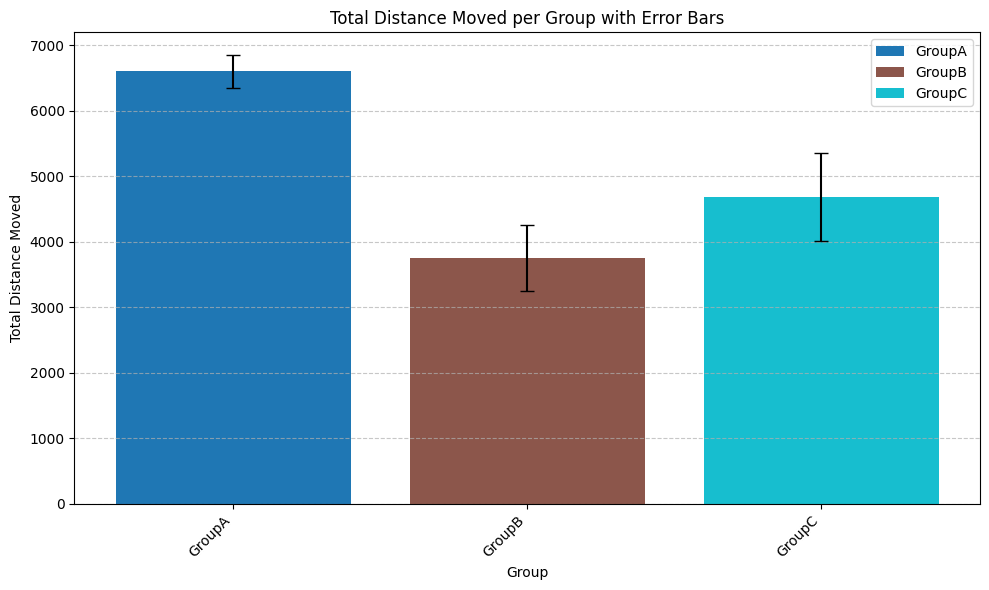

In [26]:
# Reset index to make 'Group' a regular column
grouped_data = grouped_data.reset_index()

# Sort the DataFrame by the order of appearance in the original DataFrame
grouped_data['Group'] = pd.Categorical(grouped_data['Group'], categories=df['Group'].unique(), ordered=True)
grouped_data = grouped_data.sort_values('Group')

# Assigning colors to each group
colors = plt.cm.tab10(np.linspace(0, 1, len(grouped_data)))

# Plotting the bar graph with error bars and colored bars
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['Group'], grouped_data['mean'], yerr=grouped_data['sem'], capsize=5, color=colors)

# Adding labels, title, and customizing aesthetics
plt.xlabel('Group')
plt.ylabel('Total Distance Moved')
plt.title('Total Distance Moved per Group with Error Bars')

# Adding legend with corresponding colors
plt.legend(bars, grouped_data['Group'], loc='upper right')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adding horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = grouped_data_1

# Ensure 'Distance moved' is numeric
df['Distance moved'] = pd.to_numeric(df['Distance moved'], errors='coerce')

# Check if 'Group' is categorical
if not pd.api.types.is_categorical_dtype(df['Group']):
    df['Group'] = df['Group'].astype('category')

# Perform one-way ANOVA using ols formula
model = ols('Q("Distance moved") ~ C(Group)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Perform Tukey's HSD test for multiple comparisons
tukey_results = pairwise_tukeyhsd(df['Distance moved'], df['Group'])

# Print ANOVA results
print("ANOVA Results:")
print(anova_results)

# Print Tukey's HSD results
print("\nTukey's HSD Results:")
print(tukey_results)

<ipython-input-28-e648099dbdc4>:14: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



ANOVA Results:
                sum_sq    df         F    PR(>F)
C(Group)  5.052619e+07   2.0  8.234551  0.001256
Residual  1.012420e+08  33.0       NaN       NaN

Tukey's HSD Results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
GroupA GroupB -2847.1217  0.001 -4601.7529 -1092.4904   True
GroupA GroupC -1909.5617 0.0305 -3664.1929  -154.9304   True
GroupB GroupC     937.56 0.3992  -817.0712  2692.1912  False
------------------------------------------------------------


In [29]:
import pandas as pd
from scipy.stats import ttest_ind

df = grouped_data_1

# Ensure 'Distance moved' is numeric
df['Distance moved'] = pd.to_numeric(df['Distance moved'], errors='coerce')

# Create a dictionary to map group numbers to group names
group_mapping = {i + 1: group_name for i, group_name in enumerate(df['Group'].unique())}

# Print the available groups and their corresponding numbers
print("Available Groups:")
for num, group_name in group_mapping.items():
    print(f"{num}: {group_name}")

# Input statement to get user input for group numbers to compare
group_num1 = int(input("Enter the number of the first group: "))
group_num2 = int(input("Enter the number of the second group: "))

# Get the group names based on user input
group1 = group_mapping.get(group_num1)
group2 = group_mapping.get(group_num2)

# Filter the DataFrame for the specified groups
group1_data = df[df['Group'] == group1]['Distance moved']
group2_data = df[df['Group'] == group2]['Distance moved']

# Perform t-test for independent samples
t_stat, p_value = ttest_ind(group1_data, group2_data)

# Print t-test results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")

Available Groups:
1: GroupA
2: GroupB
3: GroupC
Enter the number of the first group: 1
Enter the number of the second group: 2
T-Statistic: 5.053823655527288
P-Value: 4.6250756138373295e-05
The difference between the groups is statistically significant.
